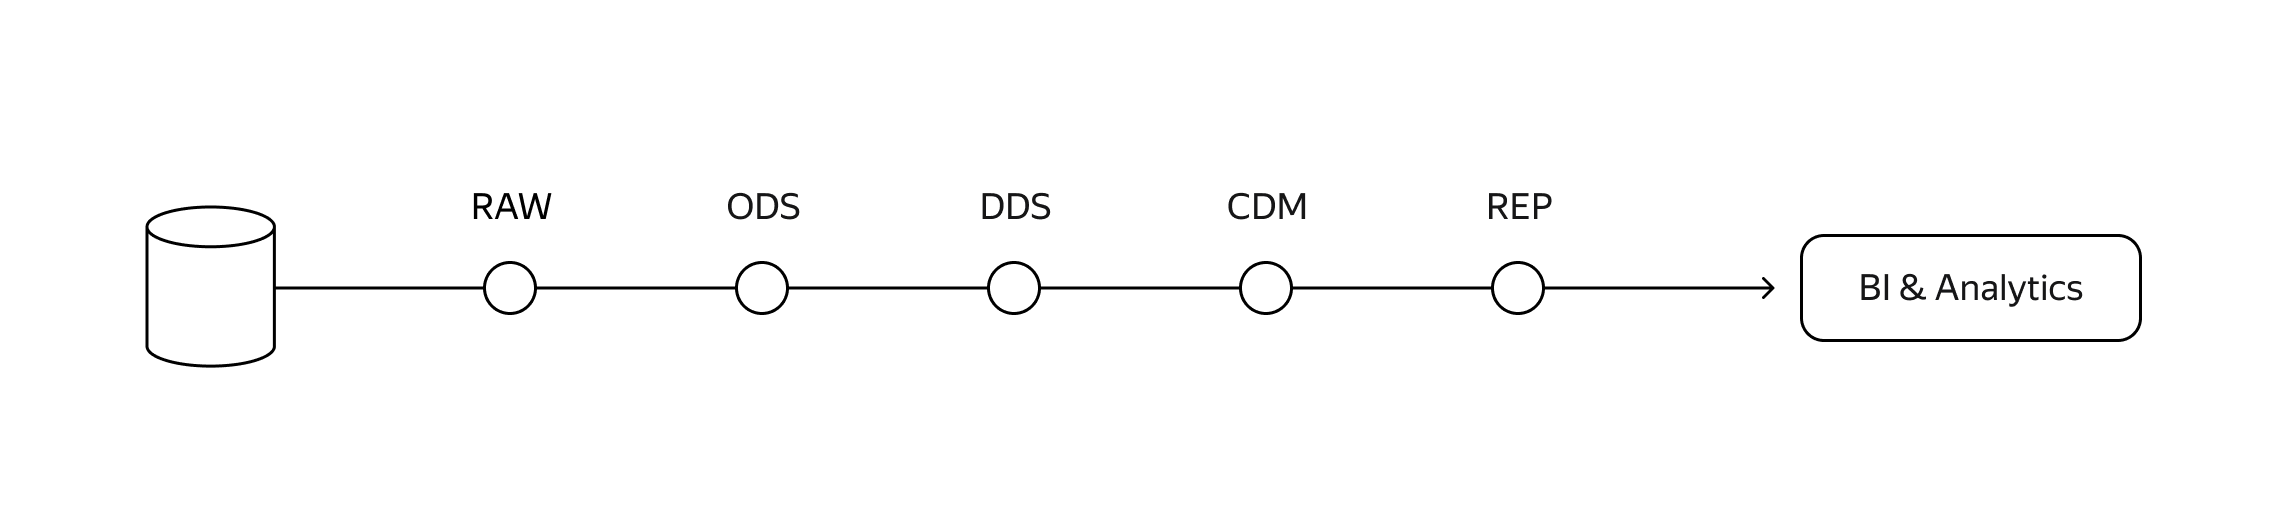

- Raw слой сырых данных, исходные данные сохраняются как есть, чтобы можно было делать дополнительные етл без перевыгрузки
- ODS (operational data store) - хранилище операционных данных. Сырые данные очищаются от тех информации (даты обновления строк, изменения полей и тд) Состояние данных близко к источнику
- DDS (detail data store) - хранилище детализированных данных. Добавление справочников, нормализация, создание ключей связей. Удобно использовать информацию из разных источников.
- CDM (common data marts) - общие витрины данных. Создаются витрины с агрегатами и показателями, с детализацией вплоть до пользователей. Данные поступаю по регламенту из DDS. Могут переиспользоваться в разных REP
- REP (reporting) - отчетность. Данные направляются в BI или автоматизированные боты. Данные подготовлены для конкретной задачи

Некоторые слои могут отсутсвовать

Обычная схема:
Источник данных -> Слой Raw -> Слой ODS -> Слой CDM

In [ ]:
# Пример подключения к БД

import psycopg2
import pandas as pd
import numpy as np

conn = psycopg2.connect("host='localhost' port='5432' dbname='postgres' user='newuser' password='password'")
# переменная conn создаёт подключение к БД
cur = conn.cursor()  

In [ ]:
# Асинхронное
import requests
import time

api_host = 'https://d5dg1j9kt695d30blp03.apigw.yandexcloud.net'
nickname = 'AlexanderZhukov'
api_key = '5f55e6c0-e9e5-4a9c-b313-63c01fc31460'
cohort = 12

generate_report_response = requests.post(
    f"{api_host}/generate_report", # точка входа
    headers={
    "X-API-KEY": api_key, # ключ API
    "X-Nickname": nickname, # авторизационные данные
    "X-Cohort": str(cohort) # авторизационные данные
    }
).json()
task_id = generate_report_response["task_id"]
print(generate_report_response)

time.sleep(60)

get_report_response = requests.get(
    f"{api_host}/get_report?task_id={task_id}",
    headers={
    "X-API-KEY": api_key,
    "X-Nickname": nickname,
    "X-Cohort": str(cohort)
    }
).json()

print(get_report_response)